In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
df = pd.read_csv('/Users/suleman/Downloads/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv', encoding = 'unicode_escape')
## We use encoding = 'unicode_escape' to prevent error 

In [19]:
df.shape 
## Purpose: Gives the dimensions (rows, columns) of the DataFrame

(11251, 15)

In [21]:
df.head()
## Purpose: Shows the first 5 rows of the DataFrame by default.We can also pass the number inside for  

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [27]:
## Data Cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [25]:
## Drop unrealated/blank column 
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [37]:
## Check for null values 
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [39]:
df.shape

(11239, 13)

In [33]:
## drop null values 
df.dropna(inplace = True)
## we use (inplace = true) to make sure that values get updated 

In [41]:
## Change data type from float to int 
df['Amount'] = df['Amount'].astype('int')

In [43]:
## To check data type
df['Amount'].dtypes

dtype('int64')

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [53]:
## Rename column name from orders to no of orders for precise understanding
df.rename(columns = {'Orders': 'No of Orders'},inplace = True)

In [59]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,No of Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [65]:
## this function describe() is use for describe the data in data frame like(mean,count,std etc)
## mostly helpful and use this to see few columns or specific data and their mean , std, count etc
df.describe()

,User_ID,Age,Marital_Status,No of Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [75]:
## here we will specifically exploring describe to find min and max age, min-max amount etc
df[['Age','No of Orders','Amount']].describe()

,Age,No of Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


<h1>Exploratory Data Analysis</h1>

<h2>Analysis on Gender</h2>

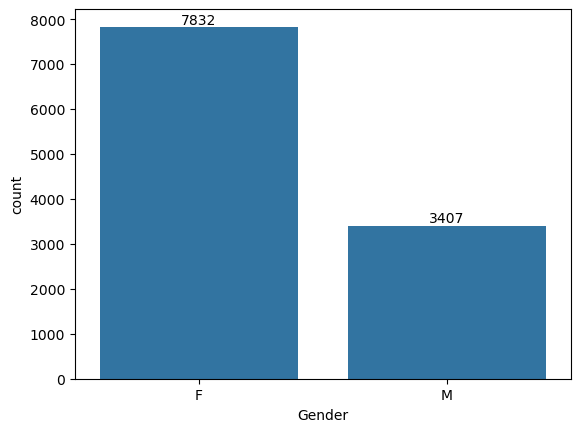

In [84]:
ax = sns.countplot(x = 'Gender', data = df)
## here we are using loop for the counting the number of male and female 
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='count'>

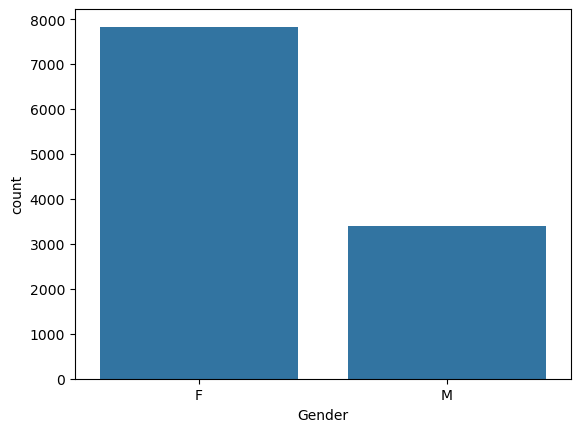

In [86]:
sns.countplot(x = 'Gender', data = df)

In [92]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False) 

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

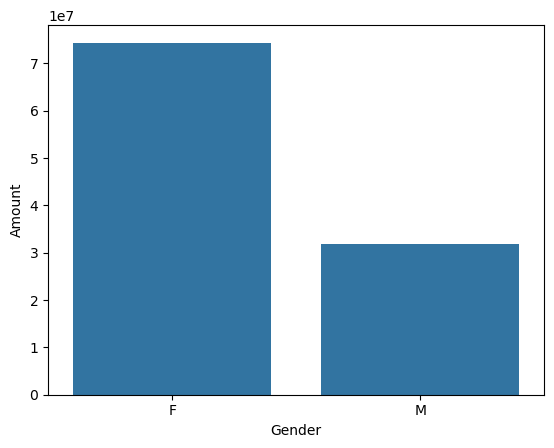

In [96]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False) 
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

<h2>From above gender graphs we can see that most of the buyers are females and their purchasing power is also more than men</h2>

<h2>Analysis on Age</h2>

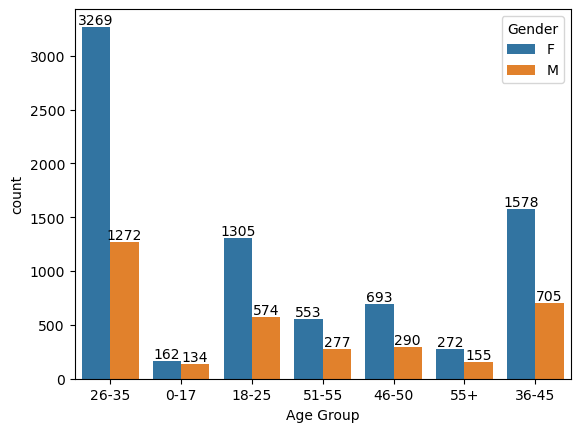

In [102]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

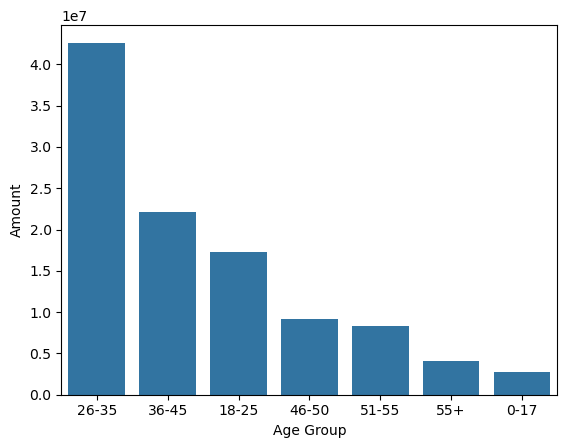

In [104]:
## Total Amount vs Age Group 
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

<h2>From the above graph we can see that most of the buyers are from female age group 26-35 </h2>

<h2>Analysis on State</h2>

<Axes: xlabel='State', ylabel='No of Orders'>

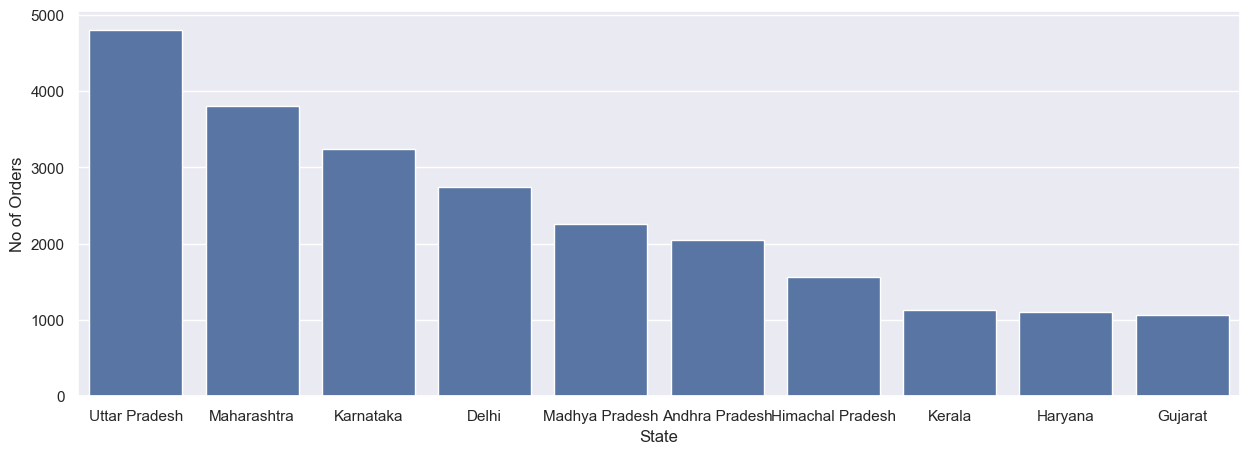

In [110]:
sales_state = df.groupby(['State'], as_index = False)['No of Orders'].sum().sort_values(by = 'No of Orders', ascending = False).head(10)
## we use this set size to arrange the graph accordingly 
sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x = 'State', y= 'No of Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

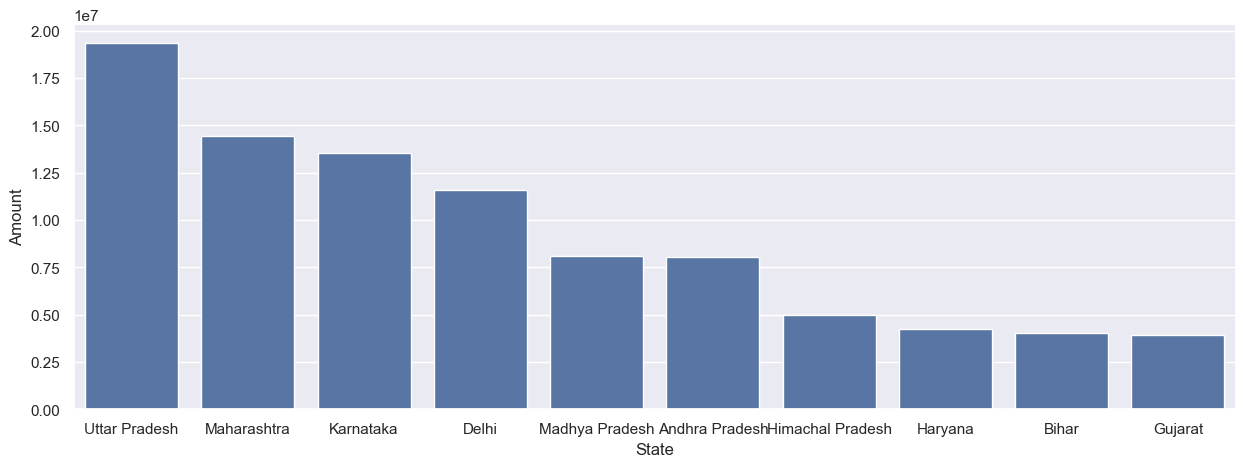

In [114]:
## Total amount and sales from top 10 states 
sales_state= df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y= 'Amount', data = sales_state)

<h2>From above graph we can see that most of the orders and total sale/amount is from Uttar Pradesh,Maharashtra and Karnataka respectively </h2>

<h2>Analysis on Marital Status</h2>

In [123]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,No of Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


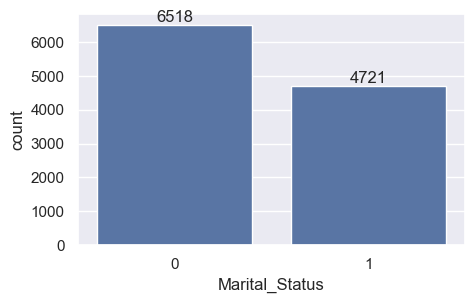

In [135]:
mar_stat = sns.countplot(x='Marital_Status', data= df)
sns.set(rc={'figure.figsize':(5,2)})
for bars in mar_stat.containers:
    mar_stat.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

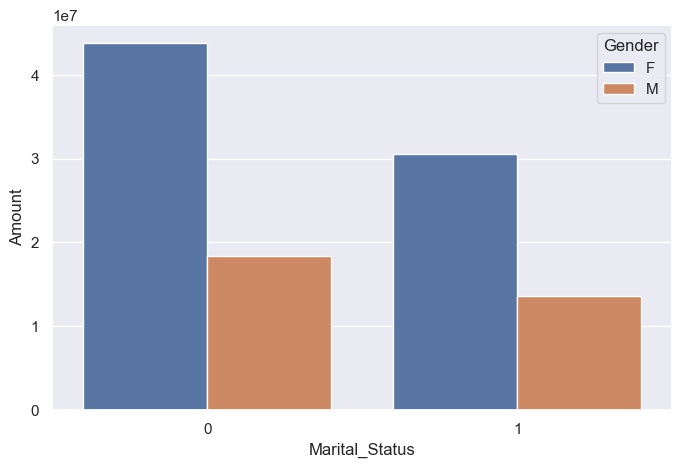

In [147]:
## Sales according to the marital status 
mar_sales = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data=mar_sales, x= 'Marital_Status', y= 'Amount', hue='Gender')

<h2>From the above graph we can see that most of the buyers are married women and their purchasing power is also high</h2>

<h2>Analysis on Occupation</h2>

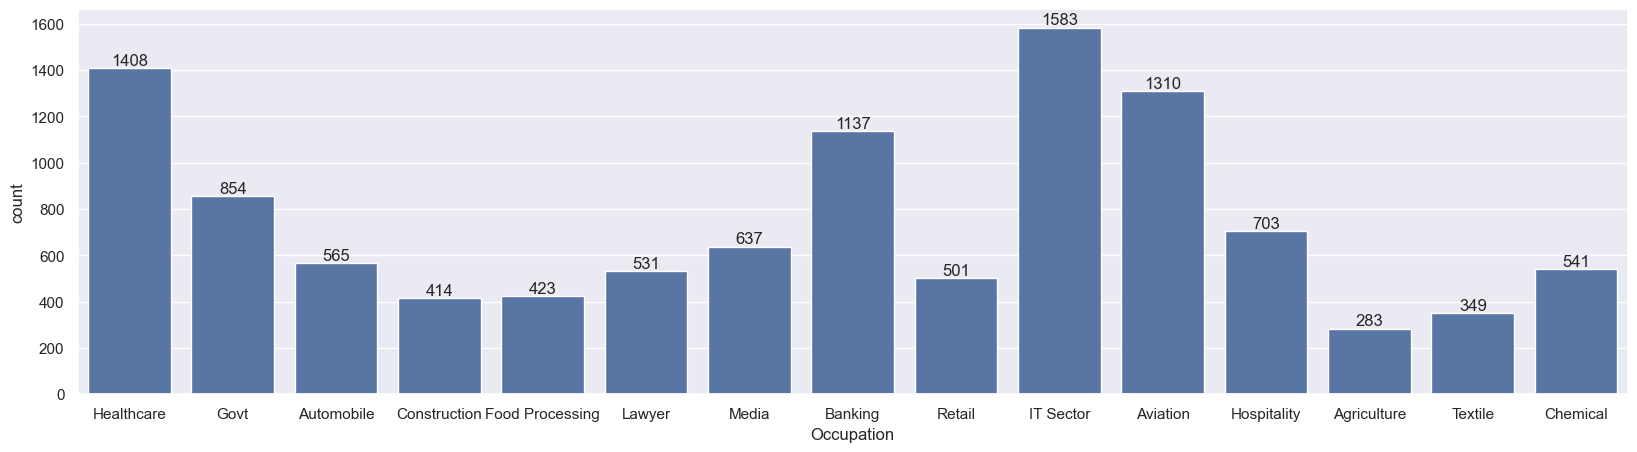

In [150]:
sns.set(rc={'figure.figsize': (20,5)})
ax= sns.countplot(x='Occupation', data= df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

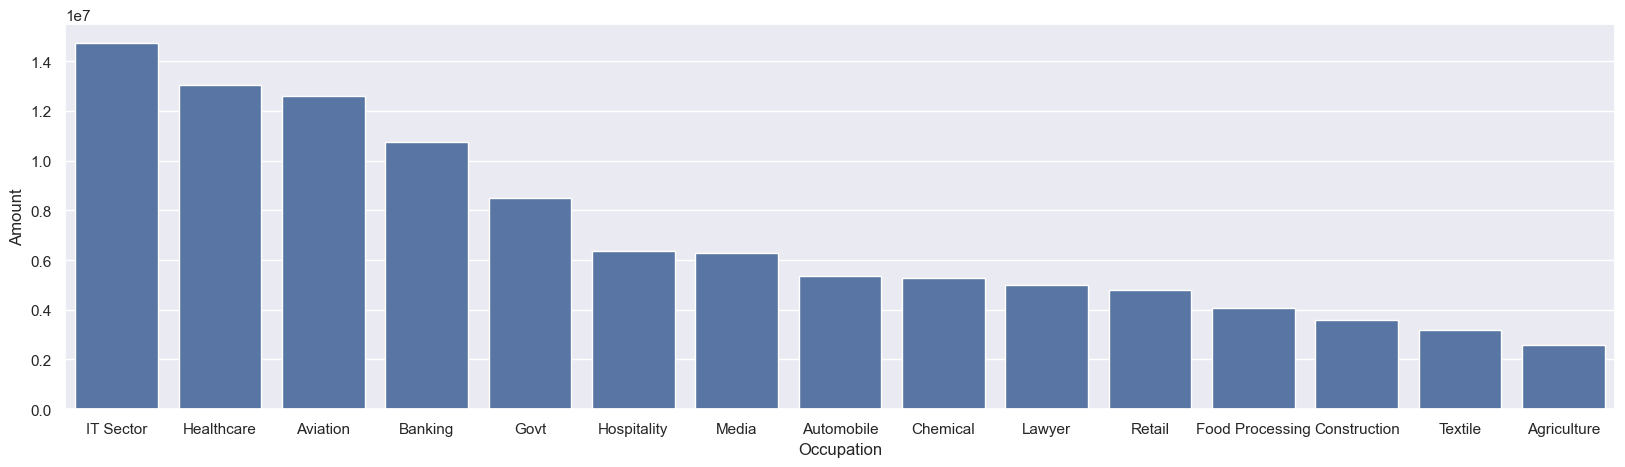

In [157]:
occup_sales= df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation', y= 'Amount', data = occup_sales)

<h2>From the above graph we can see that most of the buyers are from IT, Healthcare and Aviation sector</h2>

<h2>Analysis on Product Category</h2>

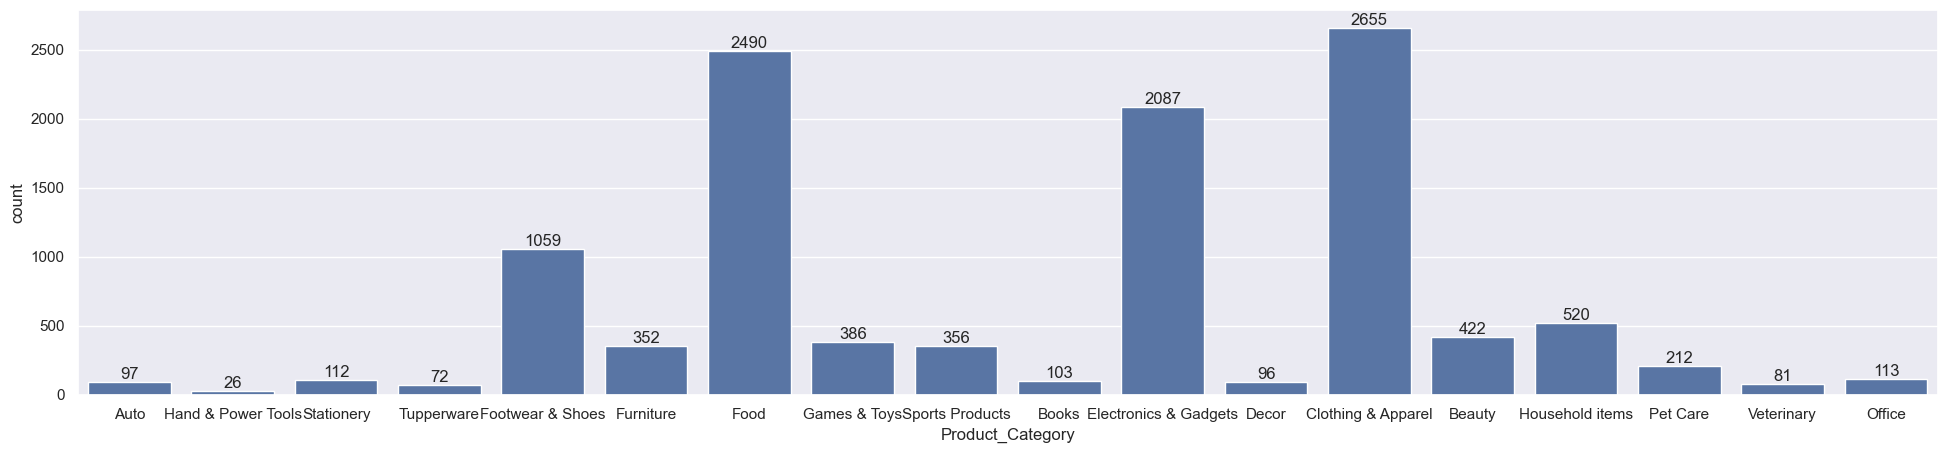

In [167]:
sns.set(rc={'figure.figsize':(24,5)})
ax= sns.countplot(x ='Product_Category', data= df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

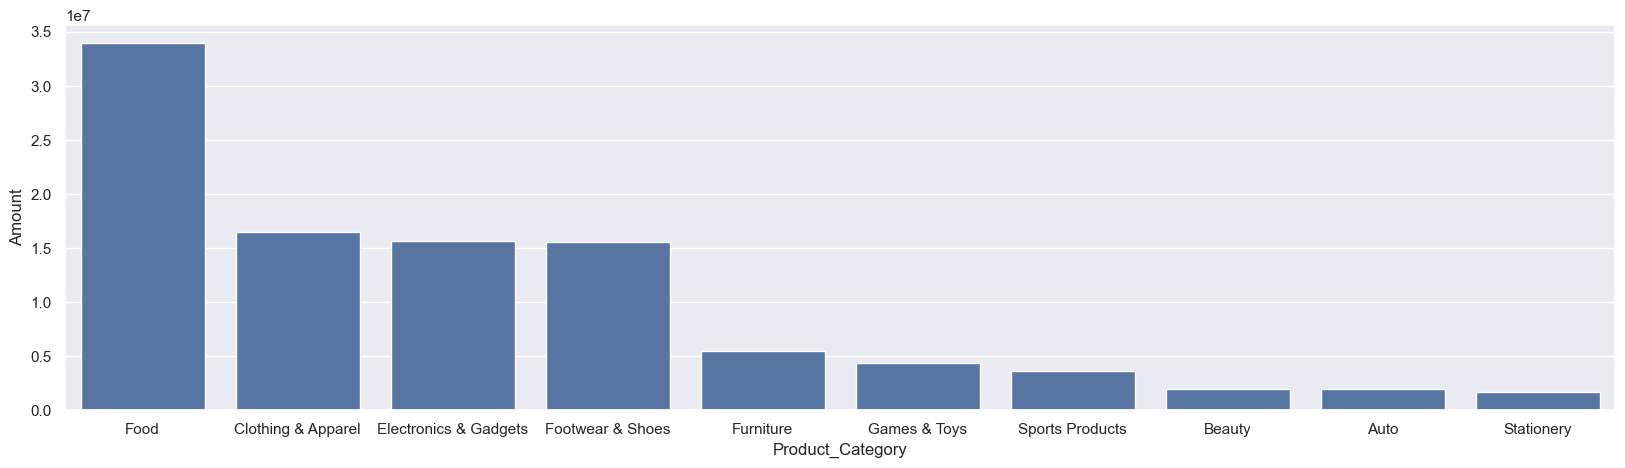

In [179]:
prod_sales= df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y= 'Amount', data= prod_sales)

<h2>From above graph we can see that most of the sold products are from Food, Clothing and Electronics</h2>

<h2>Analysis on the basis of ProductId top 10 sales product </h2>

<Axes: xlabel='Product_ID', ylabel='No of Orders'>

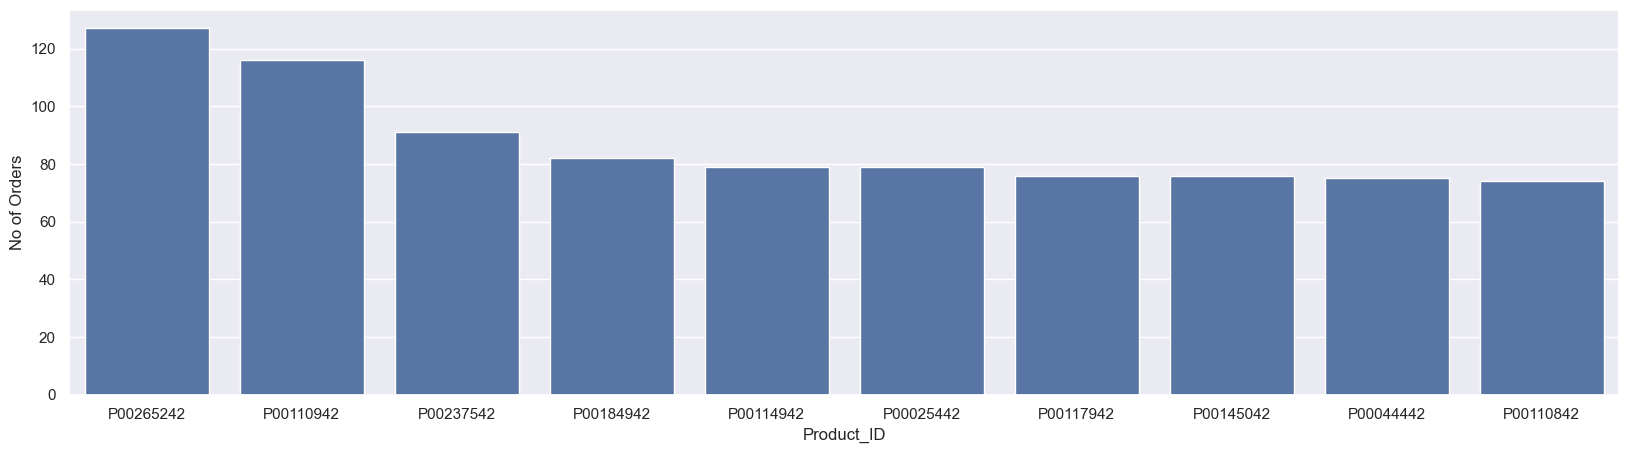

In [192]:
sns.set(rc={'figure.figsize':(20,5)})
prodId_sale= df.groupby(['Product_ID'], as_index=False)['No of Orders'].sum().sort_values(by='No of Orders', ascending=False).head(10)
sns.barplot(x='Product_ID', y= 'No of Orders', data=prodId_sale)

<Axes: xlabel='Product_ID'>

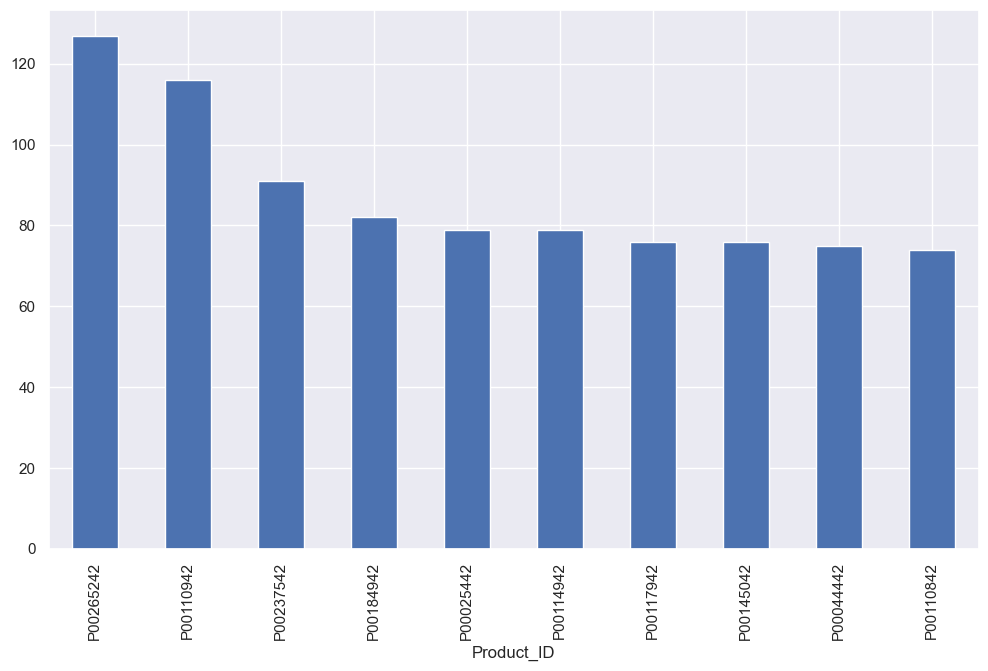

In [196]:
## same thing but different approach
fig1,ax1= plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['No of Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind= 'bar')

<h1>Conclusion</h1>

<h2>Married women age group 26-35 from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation sectors are more likely to buy products from Food, Clothing and Electronic category </h2>